In [3]:
import pandas as pd

In [4]:
Corex = pd.read_csv("Corex_Topics.csv", sep=',')
print(Corex.info())
print(Corex.describe())
print(Corex.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 5 columns):
topic_num        958 non-null int64
topic_val        958 non-null object
topic_weight     958 non-null float64
anchor           958 non-null int64
anchor_weight    958 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 37.5+ KB
None
        topic_num  topic_weight      anchor  anchor_weight
count  958.000000    958.000000  958.000000     958.000000
mean     3.713987      0.041416    5.856994       0.654269
std      1.873656      0.046072   21.394621       4.776154
min      0.000000      0.001000    1.000000       0.025000
25%      2.000000      0.029000    1.000000       0.029000
50%      5.000000      0.035000    1.000000       0.035000
75%      5.000000      0.040000    1.000000       0.040000
max      6.000000      0.882000  100.000000      88.176000
   topic_num         topic_val  topic_weight  anchor  anchor_weight
0          0              land         0.882

[t-SNE] Computing 27 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.002s
[t-SNE] Iteration 50: error = 30.1812305, gradient norm = 1.9141923 (50 iterations in 0.013s)
[t-SNE] Iteration 100: error = 32.1391716, gradient norm = 1.9403404 (50 iterations in 0.013s)
[t-SNE] Iteration 150: error = 30.6205711, gradient norm = 2.0993674 (50 iterations in 0.014s)
[t-SNE] Iteration 200: error = 30.5415077, gradient norm = 2.2440276 (50 iterations in 0.012s)
[t-SNE] Iteration 250: error = 32.7703857, gradient norm = 1.8017229 (50 iterations in 0.013s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 32.770386
[t-SNE] Iteration 300: error = 0.0001233, gradient norm = 0.0000667 (50 iterations in 0.012s)
[t-SNE] Error after 300 iterations: 0.000123


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Text(0.0209527,0.432372,'Land')

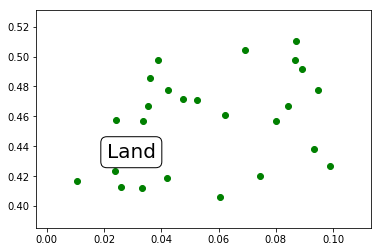

In [8]:

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import gensim 
from gensim.models import Word2Vec 

Corex = pd.read_csv("Corex_Topics.csv", sep=',')

#Select Topic plus correlated words from CorEx model
Corex_topic = Corex[Corex['topic_num']==0]['topic_val']

#Model Topic Words in a Vector of Size 100
model = gensim.models.Word2Vec(Corex_topic, min_count = 1,  
                              size = 100, window = 5) 

tokens = []
for word in model.wv.vocab:
    tokens.append(model[word])

#Project 100-Dimension Vector onto tSNE 2-Dimensions Vector
tsne_lda_model = TSNE(n_components=2, perplexity=50, 
                      learning_rate=10,n_iter=300, verbose=3, random_state=0, angle=0.75)
tsne_lda_vectors0 = tsne_lda_model.fit_transform(tokens)

#Add to Chart with Label
plt.scatter(x=tsne_lda_vectors0[:,0], y=tsne_lda_vectors0[:,1], color='green')#land
plt.text(tsne_lda_vectors0[3,0],tsne_lda_vectors0[3,1],'Land',fontsize=20,bbox=dict(boxstyle="round", fc="w"))
